## Zomato EDA with Exploded Features and Pivoting

Project is divided into 6 parts:
- 1: Importing Libraries and dataset<br>
- 2: Data Cleaning
    - 2.1: Dropping Columns
           2.1.1 Duplicates based on city_id and city
           2.1.2 Taking Resturant only in Delhi-NCR i.e. where city_id=1. Simultaneously dropping the rows which have 0 average_cost_for_two.
           2.1.3 Duplicates resturants with same res_id
           2.1.4 Creating filter column by combinig name locality latitude and longitude columns to further filter out duplicate resturant entries.
           2.1.5 Dropping Unnecssary Columns<br>
    - 2.2: Renaming columns<br>
    - 2.3: Cleaning Rating_Text column<br>
    - 2.4: Converting Columns of Avg_Rating, Avg_Cost_for_2, Photos, Votes into categorical bins<br>
            - 2.4.1 Avg_Rating Bins<br>
            - 2.4.2 Avg_Cost_for_2 Bins<br>
            - 2.4.3 Creating more bins in Price_Range column<br>
            - 2.4.4 Bins for Photos<br>
            - 2.4.5 Bins for Votes
    - 2.5: Cleaning Rating_Text column<br>
    - 2.6 Saving the clean dataframe in excel
- 3: Exploding features column<br>
    -   3.1: Joining Data with index of exploded features dataframe with df_ncr dataframe<br>
- 4: Pivoting data<br>
    -   4.1: Pivoting with Type Column<br>
    -   4.2: Pivoting with City Column<br>
    -   4.3: Pivoting with Price_Range Column<br>
    -   4.4: Pivoting with Rating_Range Column<br>
    -   4.5: Pivoting with Rating_Text Column<br>
    -   4.6: Pivoting with Photo_Range Column<br>
    -   4.7: Pivoting with Vote_Range Column<br>
- 5: Plotting Horizontal Bar Graphs<br>
- 6: Saving Pivots in excel<br>

### 1 Impoting Libraries and Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_row', 100000)
pd.set_option('display.max_columns', 5000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib and associated plotting modules 
import matplotlib.cm as cm 
import matplotlib.colors as colors 

In [2]:
df_copy = pd.read_csv("zomato_restaurants_in_India.csv")

In [3]:
df=df_copy
df.head(1)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.21145,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1


In [4]:
print(df.shape)

(211944, 26)


### 2 Data Cleaning

#### 2.1: Dropping Columns

2.1.1 Dropping Duplicates based on city_id and city

In [5]:
city_df = df.drop_duplicates(subset=['city_id','city'])
city_df = city_df.sort_values(by='city_id')
city_df.reset_index(inplace=True)
city_df[['city_id','city']].head(10)

,city_id,city
0,1,Gurgaon
1,1,Greater Noida
2,1,Ghaziabad
3,1,Faridabad
4,1,Noida
5,1,New Delhi
6,2,Kolkata
7,2,Howrah
8,3,Thane
9,3,Navi Mumbai


2.1.2 Taking Resturant only in Delhi-NCR i.e. where city_id=1. Simultaneously dropping the rows which have 0 average_cost_for_two.

In [6]:
df1= df[(df.city_id==1) & (df.average_cost_for_two!=0)].reset_index(drop=True ) 
df1.shape

(5947, 26)

2.1.3 Dropping duplicate resturants with same res_id

In [7]:
df1.drop_duplicates(subset ="res_id",
                     keep = 'first', inplace = True)
df1.reset_index(drop = True,inplace=True)
print(df1.shape)

(2763, 26)


2.1.4 Creating filter column by combinig name locality latitude and longitude columns to further filter out duplicate resturant entries.

In [8]:
df1['filter']=df1['name']+df1['locality']+str(df1['latitude'])+str(df1['longitude'])
df1.drop_duplicates(subset ="filter",
                     keep = 'first', inplace = True)
df1.reset_index(drop = True,inplace=True)
df1=df1.drop(['filter'],axis=1)
print(df1.shape)

(2733, 26)


2.1.5 Dropping Unnecssary Columns<br>
'url','address','name','currency','country_id','city_id','locality','latitude','longitude','locality_verbose','zipcode','takeaway','opentable_support','delivery','timings'

In [9]:
df_ncr=df1.drop(['url','address','name','currency','country_id','city_id','locality','latitude','longitude','locality_verbose','zipcode','takeaway','opentable_support','delivery','timings'],axis=1)

#### 2.2 Renaming columns

In [10]:
dict = {'aggregate_rating' : 'Avg_Rating',
        'average_cost_for_two' : 'Avg_Cost_for_2',
        'city' : 'City',
        'cuisines' : 'Cuisines',
        'establishment' : 'Type',
        'highlights' : 'Features',
       'photo_count' : 'Photos',
        'price_range' : 'Price_Range',
        'rating_text' : 'Rating_Text',
        'res_id' : 'Id',
        'votes' : 'Votes',
       }
  

df_ncr.rename(columns=dict,
          inplace=True)

In [11]:
df_ncr.describe()

,Id,Avg_Cost_for_2,Price_Range,Avg_Rating,Votes,Photos
count,2.733000e+03,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,1.140354e+07,948.013172,2.035126,3.721222,649.198683,686.354190
std,8.995391e+06,978.037842,1.052194,0.930602,988.766399,1366.762679
min,5.000000e+01,40.000000,1.000000,0.000000,0.000000,0.000000
25%,3.044300e+05,350.000000,1.000000,3.700000,87.000000,34.000000
50%,1.834994e+07,600.000000,2.000000,4.000000,327.000000,206.000000
75%,1.862837e+07,1300.000000,3.000000,4.200000,811.000000,655.000000
max,1.915414e+07,8000.000000,4.000000,4.900000,14751.000000,17702.000000


In [12]:
df_ncr.head(1)

,Id,Type,City,Cuisines,Avg_Cost_for_2,Price_Range,Features,Avg_Rating,Rating_Text,Votes,Photos
0,18429148,['Fine Dining'],New Delhi,"Asian, Chinese, Thai, Japanese",2500,4,"['Credit Card', 'Debit Card', 'Lunch', 'Serves...",4.7,Excellent,3234,8344


#### 2.3 Cleaning Type column

In [13]:
#removing punctuations from Type column
l={"'":"","[":"","]":""}
for i in range(len(df_ncr)):
    df_ncr.loc[i,'Type']=df_ncr.loc[i,'Type'].translate(str.maketrans(l))

In [14]:
df_ncr.Type.value_counts()

Casual Dining      443
Quick Bites        405
                   242
Café               182
Fine Dining        154
Dessert Parlour    134
Lounge             106
Bakery             104
Dhaba              101
Food Truck          99
Kiosk               95
Butcher Shop        92
Bar                 80
Food Court          80
Sweet Shop          70
Pub                 65
Paan Shop           60
Bhojanalya          56
Confectionery       53
Beverage Shop       51
Microbrewery        30
Club                23
Cocktail Bar         8
Name: Type, dtype: int64

In [15]:
#replacing null values of type with not defined in data set
df_ncr["Type"]= df_ncr["Type"].replace("", "Not Defined")
df_ncr.Type.value_counts()

Casual Dining      443
Quick Bites        405
Not Defined        242
Café               182
Fine Dining        154
Dessert Parlour    134
Lounge             106
Bakery             104
Dhaba              101
Food Truck          99
Kiosk               95
Butcher Shop        92
Food Court          80
Bar                 80
Sweet Shop          70
Pub                 65
Paan Shop           60
Bhojanalya          56
Confectionery       53
Beverage Shop       51
Microbrewery        30
Club                23
Cocktail Bar         8
Name: Type, dtype: int64

#### 2.4 Converting Columns of Avg_Rating, Avg_Cost_for_2, Photos, Votes into categorical bins 

2.4.1 Avg_Rating Bins

In [16]:
df_ncr.Avg_Rating.value_counts()

4.0    355
4.1    308
3.9    292
4.2    267
3.8    199
4.3    181
3.7    159
0.0    121
3.6    115
4.4    114
3.5    100
3.4     74
4.5     72
4.6     50
3.3     43
2.4     40
4.7     35
3.2     34
3.1     29
2.3     26
4.8     18
3.0     16
2.9     14
2.8     13
2.5     13
2.2     13
2.7     10
4.9      9
2.1      4
2.6      4
2.0      3
1.9      2
Name: Avg_Rating, dtype: int64

In [17]:
df_ncr['Rating_Range'] = pd.cut(df_ncr['Avg_Rating'],bins= [0,1,2,3,4,6],labels=['Below 1','1-2','2-3','3-4','4-5'])
df_ncr.Rating_Range.value_counts()

3-4        1400
4-5        1054
2-3         153
1-2           5
Below 1       0
Name: Rating_Range, dtype: int64

In [18]:
np.where(df_ncr['Rating_Range'].isnull())

(array([1252, 1253, 1256, 1316, 1317, 1318, 1319, 1434, 1435, 1440, 1441,
        1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492,
        1493, 1494, 1495, 1496, 1497, 1499, 1500, 1501, 1502, 1536, 1538,
        1540, 1542, 1545, 1547, 1549, 1550, 1551, 1552, 1553, 1554, 1555,
        1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566,
        1567, 1568, 1569, 1570, 1580, 1581, 1583, 1585, 1586, 1587, 1588,
        1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599,
        1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610,
        1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621,
        1622, 1623, 1624, 1625, 1626, 1627, 1628, 1771, 1775, 1777, 2005,
        2460, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2549, 2550],
       dtype=int64),)

In [19]:
df_ncr[1252:1253]

,Id,Type,City,Cuisines,Avg_Cost_for_2,Price_Range,Features,Avg_Rating,Rating_Text,Votes,Photos,Rating_Range
1252,19028561,Club,New Delhi,"Japanese, Italian, Thai, Lebanese, Beverages",1500,3,"['Takeaway Available', 'Lunch', 'Serves Alcoho...",0.0,Not rated,2,49,NaN


In [20]:
df_ncr['Rating_Range'] = df_ncr['Rating_Range'].cat.add_categories('Not rated')
df_ncr['Rating_Range'].fillna('Not rated',inplace=True)

2.4.2 Avg_Cost_for_2 Bins

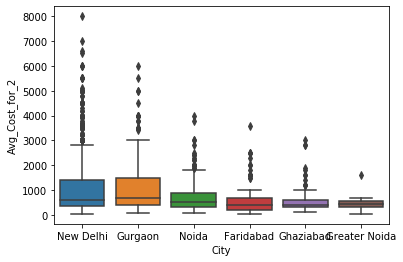

In [21]:
sns.boxplot(x="City",y="Avg_Cost_for_2", data= df_ncr)

2.4.3 Creating more bins  in Price_Range column

In [22]:
bins=[0,499,999,1499,1999,2499,2999,3499,3999,4499,8000]
labels=['Below 500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','Above 4500']
df_ncr['Price_Range'] = pd.cut(df_ncr['Avg_Cost_for_2'],bins,labels=labels)
df_ncr.Price_Range.value_counts()

Below 500     1116
500-1000       755
1500-2000      275
1000-1500      237
2000-2500      148
Above 4500      50
3000-3500       50
2500-3000       46
3500-4000       32
4000-4500       24
Name: Price_Range, dtype: int64

2.4.4 Bins for Photos

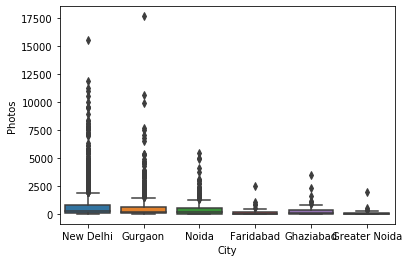

In [23]:
sns.boxplot(x="City",y="Photos", data= df_ncr)

In [24]:
bins=[-1,99,999,9999,99999]
labels=['Below 100','100-1k','1k-10k','Above 10k']
df_ncr['Photo_Range'] = pd.cut(df_ncr['Photos'],bins,labels=labels)
df_ncr.Photo_Range.value_counts()

100-1k       1217
Below 100    1022
1k-10k        487
Above 10k       7
Name: Photo_Range, dtype: int64

2.4.5 Bins for Votes

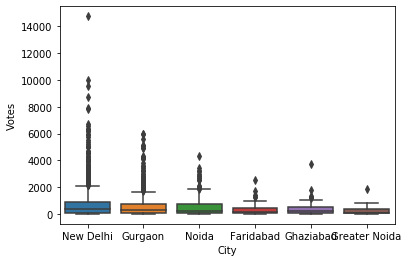

In [25]:
sns.boxplot(x="City",y="Votes", data= df_ncr)

In [26]:
bins=[-1,99,999,9999,99999]
labels=['Below 100','100-1k','1k-10k','Above 10k']
df_ncr['Vote_Range'] = pd.cut(df_ncr['Votes'],bins,labels=labels)
df_ncr.Vote_Range.value_counts()

100-1k       1444
Below 100     744
1k-10k        544
Above 10k       1
Name: Vote_Range, dtype: int64

#### 2.5 Cleaning Rating_Text column

In [27]:
df_ncr['Rating_Text'].value_counts()

Very Good        1221
Good              864
Average           250
Excellent         183
Not rated         121
Poor               87
Muy Bueno           1
Muito Bom           1
Bardzo dobrze       1
Excelente           1
Scarso              1
Çok iyi             1
Bom                 1
Name: Rating_Text, dtype: int64

In [28]:
a=["Çok iyi","Bom"]
c=["Excelente"]
b=["Muy Bueno","Bardzo dobrze", "Muito Bom"]
df_ncr["Rating_Text"] = df_ncr["Rating_Text"].replace(to_replace=a,value='Good')
df_ncr["Rating_Text"] = df_ncr["Rating_Text"].replace(to_replace=b,value='Very Good')
df_ncr["Rating_Text"] = df_ncr["Rating_Text"].replace(to_replace=c,value='Excellent')
df_ncr["Rating_Text"] = df_ncr["Rating_Text"].replace(to_replace='Scarso',value='Poor')
df_ncr["Rating_Text"].value_counts()

Very Good    1224
Good          866
Average       250
Excellent     184
Not rated     121
Poor           88
Name: Rating_Text, dtype: int64

In [29]:
df_ncr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              2733 non-null   int64   
 1   Type            2733 non-null   object  
 2   City            2733 non-null   object  
 3   Cuisines        2733 non-null   object  
 4   Avg_Cost_for_2  2733 non-null   int64   
 5   Price_Range     2733 non-null   category
 6   Features        2733 non-null   object  
 7   Avg_Rating      2733 non-null   float64 
 8   Rating_Text     2733 non-null   object  
 9   Votes           2733 non-null   int64   
 10  Photos          2733 non-null   int64   
 11  Rating_Range    2733 non-null   category
 12  Photo_Range     2733 non-null   category
 13  Vote_Range      2733 non-null   category
dtypes: category(4), float64(1), int64(4), object(5)
memory usage: 225.3+ KB


#### 2.6 Saving the clean dataframe in excel

In [30]:
with pd.ExcelWriter("zomato_clean.xlsx") as writer:
    df_ncr.to_excel(writer, sheet_name="zomato_clean", index=False)

### 3 Exploding features column

In [31]:
#removing punctuations from features column
l={"'":"","[":"","]":""}
for i in range(len(df_ncr)):
    df_ncr.loc[i,'Features']=df_ncr.loc[i,'Features'].translate(str.maketrans(l))

In [32]:
total_features = df_ncr.Features.value_counts()
total_features.head(2)

No Seating Available, Dinner, Delivery, Lunch, Cash, Takeaway Available    19
Dinner, Delivery, Lunch, Cash, Takeaway Available, Indoor Seating          18
Name: Features, dtype: int64

Features

In [33]:
features = {}

cnt = 0
for i in total_features.index:
    for j in i.split(', '):
        if j not in features.keys():
            features[j] = total_features[cnt]
        else:
            features[j] += total_features[cnt]
    cnt += 1

sorted_features = pd.Series(features).sort_values(ascending=False)
sorted_features.head()

Cash                  2731
Takeaway Available    2219
Dinner                2171
Lunch                 2075
Credit Card           1891
dtype: int64

In [34]:
s=sorted_features.index.drop_duplicates().sort_values(ascending= True)

In [35]:
f = pd.DataFrame(s).transpose()
f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,4/5 Star,Above 18 Only,Air Conditioned,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,Board Games,Breakfast,Brunch,Buffet,Card Upon Delivery,Cash,Catering Available,City View,Couple Entry Only,Craft Beer,Credit Card,DJ,Dance Floor,Dark Kitchen,Debit Card,Delivery,Desserts and Bakes,Digital Payments Accepted,Dinner,Disabled Friendly,Drive Thru,Drive in,Entry Fee,Free Parking,Free Wifi,Fullbar,Gaming Area,Gastro Pub,Gluten Free Options,Group Meal,Halal,Home Baker,Hookah,Indoor Seating,Karaoke,Keto Options,Kid Friendly,LGBTQIA Friendly,Live Entertainment,Live Music,Live Sports Screening,Lunch,Lunch Menu,Luxury Dining,Mall Parking,Members Only,Nightlife,No Alcohol Available,No Seating Available,Outdoor Seating,Paid Wifi,Pet Friendly,Pool Table,Poolside,Pre-Ordering Required,Private Dining Area Available,Pure Veg,Resto Bar,Restricted Entry,Romantic Dining,Rooftop,Self Service,Serves Alcohol,Serves Cocktails,Serves Jain Food,Smoking Area,Sneakpeek,Sodexo,Speakeasy,Sports TV,Standing Tables,Table Reservation Not Required,Table booking for Groups,Table booking not available,Table booking recommended,Table reservation required,Takeaway Available,Ticket Restaurant,Valet Parking Available,Variable Menu,Vegan Options,Wheelchair Accessible,Wifi,Wine


In [36]:
f.shape

(1, 92)

In [37]:
f1 = pd.DataFrame(columns=range(0,92),
                  index=range(0, 2733))
f1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Joining Data with index of exploded features dataframe with df_ncr dataframe

In [38]:
f1.columns = f.iloc[0]
f1=pd.merge(f1,df_ncr,how='inner',left_index=True ,right_index=True)
f1.head(1)

,4/5 Star,Above 18 Only,Air Conditioned,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,Board Games,Breakfast,Brunch,Buffet,Card Upon Delivery,Cash,Catering Available,City View,Couple Entry Only,Craft Beer,Credit Card,DJ,Dance Floor,Dark Kitchen,Debit Card,Delivery,Desserts and Bakes,Digital Payments Accepted,Dinner,Disabled Friendly,Drive Thru,Drive in,Entry Fee,Free Parking,Free Wifi,Fullbar,Gaming Area,Gastro Pub,Gluten Free Options,Group Meal,Halal,Home Baker,Hookah,Indoor Seating,Karaoke,Keto Options,Kid Friendly,LGBTQIA Friendly,Live Entertainment,Live Music,Live Sports Screening,Lunch,Lunch Menu,Luxury Dining,Mall Parking,Members Only,Nightlife,No Alcohol Available,No Seating Available,Outdoor Seating,Paid Wifi,Pet Friendly,Pool Table,Poolside,Pre-Ordering Required,Private Dining Area Available,Pure Veg,Resto Bar,Restricted Entry,Romantic Dining,Rooftop,Self Service,Serves Alcohol,Serves Cocktails,Serves Jain Food,Smoking Area,Sneakpeek,Sodexo,Speakeasy,Sports TV,Standing Tables,Table Reservation Not Required,Table booking for Groups,Table booking not available,Table booking recommended,Table reservation required,Takeaway Available,Ticket Restaurant,Valet Parking Available,Variable Menu,Vegan Options,Wheelchair Accessible,Wifi,Wine,Id,Type,City,Cuisines,Avg_Cost_for_2,Price_Range,Features,Avg_Rating,Rating_Text,Votes,Photos,Rating_Range,Photo_Range,Vote_Range
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429148,Fine Dining,New Delhi,"Asian, Chinese, Thai, Japanese",2500,2500-3000,"Credit Card, Debit Card, Lunch, Serves Alcohol...",4.7,Excellent,3234,8344,4-5,1k-10k,1k-10k


In [39]:
f1.head(1)

,4/5 Star,Above 18 Only,Air Conditioned,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,Board Games,Breakfast,Brunch,Buffet,Card Upon Delivery,Cash,Catering Available,City View,Couple Entry Only,Craft Beer,Credit Card,DJ,Dance Floor,Dark Kitchen,Debit Card,Delivery,Desserts and Bakes,Digital Payments Accepted,Dinner,Disabled Friendly,Drive Thru,Drive in,Entry Fee,Free Parking,Free Wifi,Fullbar,Gaming Area,Gastro Pub,Gluten Free Options,Group Meal,Halal,Home Baker,Hookah,Indoor Seating,Karaoke,Keto Options,Kid Friendly,LGBTQIA Friendly,Live Entertainment,Live Music,Live Sports Screening,Lunch,Lunch Menu,Luxury Dining,Mall Parking,Members Only,Nightlife,No Alcohol Available,No Seating Available,Outdoor Seating,Paid Wifi,Pet Friendly,Pool Table,Poolside,Pre-Ordering Required,Private Dining Area Available,Pure Veg,Resto Bar,Restricted Entry,Romantic Dining,Rooftop,Self Service,Serves Alcohol,Serves Cocktails,Serves Jain Food,Smoking Area,Sneakpeek,Sodexo,Speakeasy,Sports TV,Standing Tables,Table Reservation Not Required,Table booking for Groups,Table booking not available,Table booking recommended,Table reservation required,Takeaway Available,Ticket Restaurant,Valet Parking Available,Variable Menu,Vegan Options,Wheelchair Accessible,Wifi,Wine,Id,Type,City,Cuisines,Avg_Cost_for_2,Price_Range,Features,Avg_Rating,Rating_Text,Votes,Photos,Rating_Range,Photo_Range,Vote_Range
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18429148,Fine Dining,New Delhi,"Asian, Chinese, Thai, Japanese",2500,2500-3000,"Credit Card, Debit Card, Lunch, Serves Alcohol...",4.7,Excellent,3234,8344,4-5,1k-10k,1k-10k


In [40]:
def checkmatch(a):
    """function to check whether feature in column of f1 is present in df_ncr dataframe
        Args:
        a (int): number of columns
        Returns
        (int): 1 if feature is present and 0 if not
        
    """
    for i in range(2733):
        if a in f1.loc[i,'Features']:f1.loc[i,a]=1
        else:f1.loc[i,a]=0

In [41]:
for j in range (92):# call to function check match for 92 coulmn features
    checkmatch(f1.columns[j])

In [42]:
f1.head(1)

,4/5 Star,Above 18 Only,Air Conditioned,All Day Breakfast,Available for Functions,Axis Bank - Dining Delights,BYOB,Beer,Board Games,Breakfast,Brunch,Buffet,Card Upon Delivery,Cash,Catering Available,City View,Couple Entry Only,Craft Beer,Credit Card,DJ,Dance Floor,Dark Kitchen,Debit Card,Delivery,Desserts and Bakes,Digital Payments Accepted,Dinner,Disabled Friendly,Drive Thru,Drive in,Entry Fee,Free Parking,Free Wifi,Fullbar,Gaming Area,Gastro Pub,Gluten Free Options,Group Meal,Halal,Home Baker,Hookah,Indoor Seating,Karaoke,Keto Options,Kid Friendly,LGBTQIA Friendly,Live Entertainment,Live Music,Live Sports Screening,Lunch,Lunch Menu,Luxury Dining,Mall Parking,Members Only,Nightlife,No Alcohol Available,No Seating Available,Outdoor Seating,Paid Wifi,Pet Friendly,Pool Table,Poolside,Pre-Ordering Required,Private Dining Area Available,Pure Veg,Resto Bar,Restricted Entry,Romantic Dining,Rooftop,Self Service,Serves Alcohol,Serves Cocktails,Serves Jain Food,Smoking Area,Sneakpeek,Sodexo,Speakeasy,Sports TV,Standing Tables,Table Reservation Not Required,Table booking for Groups,Table booking not available,Table booking recommended,Table reservation required,Takeaway Available,Ticket Restaurant,Valet Parking Available,Variable Menu,Vegan Options,Wheelchair Accessible,Wifi,Wine,Id,Type,City,Cuisines,Avg_Cost_for_2,Price_Range,Features,Avg_Rating,Rating_Text,Votes,Photos,Rating_Range,Photo_Range,Vote_Range
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,18429148,Fine Dining,New Delhi,"Asian, Chinese, Thai, Japanese",2500,2500-3000,"Credit Card, Debit Card, Lunch, Serves Alcohol...",4.7,Excellent,3234,8344,4-5,1k-10k,1k-10k


In [43]:
f1.shape

(2733, 106)

In [44]:
#creating lists to club various features
table=["Table booking for Groups","Table booking recommended","Table reservation required","Pre-Ordering Required"]
pure_veg=["Pure Veg","Vegan Options","Serves Jain Food"]
alcohol=["BYOB","Beer","Craft Beer","Fullbar","Gastro Pub","Resto Bar","Serves Alcohol","Serves Cocktails","Wine","Nightlife","Above 18 Only","Speakeasy"]
wifi=["Wifi","Free Wifi","Paid Wifi"]
delivery=["Delivery","Card Upon Delivery","Dark Kitchen"]
parking=["Free Parking","Mall Parking","Valet Parking Available"]
disfr=["Disabled Friendly","Wheelchair Accessible"]
restricted=["Members Only","Restricted Entry","Entry Fee"]
smoke=["Smoking Area","Hookah"]
lunch=["Lunch Menu", "Lunch"]
breakfast=["All Day Breakfast", "Breakfast"]
enter=["Live Entertainment","Sports TV","Live Sports Screening","Karaoke","Board Games","Gaming Area","Pool Table","Live Music","DJ","Dance Floor"]
other=["Sodexo","Axis Bank - Dining Delights","Ticket Restaurant"]

In [45]:
def colmnclub(a,b):
    """function to club various columns
        Args:
        a (list): list of columns names to clubbed
        b(str) : name of clubbed column
       
    """
    f1[b]=0
    for i in range(len(a)):
        f1[b]+=f1[a[i]]
        #del f1[a[i]]    

In [46]:
#call to function colmnclub
colmnclub(table,'Table_Booking')
colmnclub(pure_veg,'Pure_Veg')
colmnclub(alcohol,'Serves_Liquor')
colmnclub(wifi,'Wifi_Available')
colmnclub(delivery,'Delivery_Available')
colmnclub(parking,'Parking_Available')
colmnclub(disfr,'Disabled_friendly')
colmnclub(restricted,'Members_Only')
colmnclub(smoke,'Smoking_Allowed')
colmnclub(lunch,'Lunch_')
colmnclub(breakfast,'Breakfast_')
colmnclub(enter,'Entertainment')
colmnclub(other,'Other_Payment_Options')

In [47]:
f1.shape

(2733, 119)

In [48]:
f2=['Id','Type','City','Price_Range','Rating_Range','Rating_Text','Photo_Range', 'Vote_Range','Cash', 'Credit Card', 'Debit Card', 'Digital Payments Accepted', 'Other_Payment_Options',  'Brunch', 'Breakfast_',
'Dinner','Lunch_', 'Outdoor Seating', 'Indoor Seating', 'Rooftop', 'Standing Tables', 'Delivery_Available',
'Takeaway Available', 'Disabled_friendly','Entertainment', 'Parking_Available', 'Pure_Veg', 'Serves_Liquor',
 'Smoking_Allowed', 'Table_Booking', 'Wifi_Available','Air Conditioned','Members_Only']
f3=f1[f2]
f3.head(2)

,Id,Type,City,Price_Range,Rating_Range,Rating_Text,Photo_Range,Vote_Range,Cash,Credit Card,Debit Card,Digital Payments Accepted,Other_Payment_Options,Brunch,Breakfast_,Dinner,Lunch_,Outdoor Seating,Indoor Seating,Rooftop,Standing Tables,Delivery_Available,Takeaway Available,Disabled_friendly,Entertainment,Parking_Available,Pure_Veg,Serves_Liquor,Smoking_Allowed,Table_Booking,Wifi_Available,Air Conditioned,Members_Only
0,18429148,Fine Dining,New Delhi,2500-3000,4-5,Excellent,1k-10k,1k-10k,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,2,1,1,0,1,0
1,18418277,Lounge,New Delhi,1500-2000,4-5,Excellent,1k-10k,1k-10k,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,3,1,0,3,1,1,1,1,0


In [49]:
f3.shape

(2733, 33)

In [50]:
def cmatch(a):
    """function to change values greater than 1 to 1
        Args:
        a (int): index of column
        
    """
    for i in range(2733):
        if f3.loc[i,a]>0:f3.loc[i,a]=1
        else:f3.loc[i,a]=0

In [51]:
for j in range (8,33):
    checkmatch(f3.columns[j])

### 4 Pivoting data

In [52]:
c=['Cash', 'Credit Card', 'Debit Card', 'Digital Payments Accepted', 'Other_Payment_Options',  'Brunch', 'Breakfast_',
'Dinner','Lunch_', 'Outdoor Seating', 'Indoor Seating', 'Rooftop', 'Standing Tables', 'Delivery_Available',
'Takeaway Available', 'Disabled_friendly','Entertainment', 'Parking_Available', 'Pure_Veg', 'Serves_Liquor',
 'Smoking_Allowed', 'Table_Booking', 'Wifi_Available','Air Conditioned','Members_Only']

In [53]:
def pivot_tab(a,c):
    """function to pivot column and adding total column by value_count
        Args:
        a (str): pivot column name
        c[list]: list of columns to be pivoted
        Return:
        p(dataframe): pivoted dataframe with total column at pos=1
        
    """
    p=f3.pivot_table(index =[a],values =c,aggfunc =np.count_nonzero).reset_index()
    b=f3[a].value_counts().to_dict()
    p['Total'] = p[a].map(b)
    second_column = p.pop('Total')
    p.insert(1, 'Total', second_column)
    return p

4.1 Pivot with Type column

In [54]:
#pivot with type
pivot_type=pivot_tab('Type',c)
pivot_type

,Type,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Bakery,104,72,19,0,104,82,79,71,40,8,10,0,59,8,0,2,5,13,16,0,0,0,3,9,94,12
1,Bar,80,77,2,6,80,80,80,21,19,74,19,69,80,69,5,18,27,34,1,10,80,63,0,53,44,42
2,Beverage Shop,51,24,13,0,51,35,35,35,27,3,6,2,30,5,0,0,11,6,22,0,0,3,0,0,48,9
3,Bhojanalya,56,0,23,0,56,0,0,26,33,56,0,0,51,56,0,0,5,0,3,0,0,0,0,0,54,0
4,Butcher Shop,92,61,10,0,92,63,62,86,12,76,2,0,2,75,0,1,4,8,0,0,0,0,3,0,91,0
5,Café,182,161,81,8,182,167,166,103,54,163,30,33,175,163,0,24,49,43,6,5,33,41,0,53,167,96
6,Casual Dining,443,396,56,17,443,423,411,292,137,443,86,122,438,440,1,102,82,151,54,22,221,128,0,265,383,165
7,Club,23,20,1,0,23,20,21,0,1,20,4,20,22,14,6,1,1,12,0,0,22,10,0,20,6,3
8,Cocktail Bar,8,7,0,0,8,8,8,0,3,8,1,2,8,5,0,0,1,1,0,0,8,3,0,8,1,0
9,Confectionery,53,11,5,0,53,16,15,28,11,5,1,0,0,5,0,0,0,11,27,0,0,0,1,1,53,0


In [55]:
pivot_type.loc['Total',1:]= pivot_type.sum(axis=0)
pivot_type.loc['Total','Type']='All Type'
pivot_type

,Type,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Bakery,104.0,72.0,19.0,0.0,104.0,82.0,79.0,71.0,40.0,8.0,10.0,0.0,59.0,8.0,0.0,2.0,5.0,13.0,16.0,0.0,0.0,0.0,3.0,9.0,94.0,12.0
1,Bar,80.0,77.0,2.0,6.0,80.0,80.0,80.0,21.0,19.0,74.0,19.0,69.0,80.0,69.0,5.0,18.0,27.0,34.0,1.0,10.0,80.0,63.0,0.0,53.0,44.0,42.0
2,Beverage Shop,51.0,24.0,13.0,0.0,51.0,35.0,35.0,35.0,27.0,3.0,6.0,2.0,30.0,5.0,0.0,0.0,11.0,6.0,22.0,0.0,0.0,3.0,0.0,0.0,48.0,9.0
3,Bhojanalya,56.0,0.0,23.0,0.0,56.0,0.0,0.0,26.0,33.0,56.0,0.0,0.0,51.0,56.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,Butcher Shop,92.0,61.0,10.0,0.0,92.0,63.0,62.0,86.0,12.0,76.0,2.0,0.0,2.0,75.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,91.0,0.0
5,Café,182.0,161.0,81.0,8.0,182.0,167.0,166.0,103.0,54.0,163.0,30.0,33.0,175.0,163.0,0.0,24.0,49.0,43.0,6.0,5.0,33.0,41.0,0.0,53.0,167.0,96.0
6,Casual Dining,443.0,396.0,56.0,17.0,443.0,423.0,411.0,292.0,137.0,443.0,86.0,122.0,438.0,440.0,1.0,102.0,82.0,151.0,54.0,22.0,221.0,128.0,0.0,265.0,383.0,165.0
7,Club,23.0,20.0,1.0,0.0,23.0,20.0,21.0,0.0,1.0,20.0,4.0,20.0,22.0,14.0,6.0,1.0,1.0,12.0,0.0,0.0,22.0,10.0,0.0,20.0,6.0,3.0
8,Cocktail Bar,8.0,7.0,0.0,0.0,8.0,8.0,8.0,0.0,3.0,8.0,1.0,2.0,8.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,3.0,0.0,8.0,1.0,0.0
9,Confectionery,53.0,11.0,5.0,0.0,53.0,16.0,15.0,28.0,11.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,11.0,27.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0


4.2 Pivot with City column

In [56]:
#pivot with city
pivot_city=pivot_tab('City',c)
pivot_city

,City,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Faridabad,78,40,13,1,78,49,48,41,31,58,3,6,44,59,2,8,13,24,19,0,17,5,0,11,70,6
1,Ghaziabad,89,48,17,0,89,56,56,73,53,74,14,5,65,71,0,11,14,34,28,1,9,3,0,14,81,10
2,Greater Noida,21,7,3,0,21,16,16,16,13,17,2,0,12,16,0,1,7,9,4,0,0,0,1,4,19,0
3,Gurgaon,606,390,133,22,605,477,470,391,207,496,125,114,437,470,4,61,151,153,84,34,194,127,9,169,475,134
4,New Delhi,1683,1009,306,57,1682,1109,1079,1004,448,1312,233,272,1143,1250,15,201,259,427,363,45,466,290,26,470,1347,363
5,Noida,256,151,37,4,256,184,179,176,115,214,51,30,159,209,1,32,29,93,35,3,33,28,9,47,227,41


In [57]:
pivot_city.loc['Total',1:]= pivot_city.sum(axis=0)
pivot_city.loc['Total','City']='Whole NCR'
pivot_city

,City,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Faridabad,78.0,40.0,13.0,1.0,78.0,49.0,48.0,41.0,31.0,58.0,3.0,6.0,44.0,59.0,2.0,8.0,13.0,24.0,19.0,0.0,17.0,5.0,0.0,11.0,70.0,6.0
1,Ghaziabad,89.0,48.0,17.0,0.0,89.0,56.0,56.0,73.0,53.0,74.0,14.0,5.0,65.0,71.0,0.0,11.0,14.0,34.0,28.0,1.0,9.0,3.0,0.0,14.0,81.0,10.0
2,Greater Noida,21.0,7.0,3.0,0.0,21.0,16.0,16.0,16.0,13.0,17.0,2.0,0.0,12.0,16.0,0.0,1.0,7.0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,19.0,0.0
3,Gurgaon,606.0,390.0,133.0,22.0,605.0,477.0,470.0,391.0,207.0,496.0,125.0,114.0,437.0,470.0,4.0,61.0,151.0,153.0,84.0,34.0,194.0,127.0,9.0,169.0,475.0,134.0
4,New Delhi,1683.0,1009.0,306.0,57.0,1682.0,1109.0,1079.0,1004.0,448.0,1312.0,233.0,272.0,1143.0,1250.0,15.0,201.0,259.0,427.0,363.0,45.0,466.0,290.0,26.0,470.0,1347.0,363.0
5,Noida,256.0,151.0,37.0,4.0,256.0,184.0,179.0,176.0,115.0,214.0,51.0,30.0,159.0,209.0,1.0,32.0,29.0,93.0,35.0,3.0,33.0,28.0,9.0,47.0,227.0,41.0
Total,Whole NCR,2733.0,1645.0,509.0,84.0,2731.0,1891.0,1848.0,1701.0,867.0,2171.0,428.0,427.0,1860.0,2075.0,22.0,314.0,473.0,740.0,533.0,83.0,719.0,453.0,45.0,715.0,2219.0,554.0


4.3 Pivot with Price_Range column

In [58]:
#pivot with price range
pivot_pr=pivot_tab('Price_Range',c)
pivot_pr

,Price_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Below 500,1116,407,208,1,1115,487,481,773,392,672,59,2,498,668,1,45,145,162,380,0,3,5,39,12,1079,52
1,500-1000,755,457,187,4,754,566,549,610,291,668,98,39,535,631,1,89,110,170,119,8,33,48,6,79,632,119
2,1000-1500,237,190,31,12,237,219,212,149,69,225,41,98,213,216,4,45,64,94,13,18,129,98,0,123,184,99
3,1500-2000,275,256,20,9,275,272,267,106,76,272,53,157,272,269,3,61,80,116,10,33,222,149,0,189,191,135
4,2000-2500,148,141,18,11,148,147,143,52,28,142,46,76,148,139,3,34,36,58,3,12,137,86,0,130,99,71
5,2500-3000,46,42,8,7,46,46,46,4,7,42,21,16,41,36,4,12,12,25,4,5,43,23,0,40,15,19
6,3000-3500,50,49,17,13,50,50,50,4,3,49,34,17,50,39,2,14,5,32,2,1,48,19,0,50,9,20
7,3500-4000,32,32,7,9,32,32,30,2,0,29,25,9,32,23,1,6,6,25,1,2,32,12,0,26,6,20
8,4000-4500,24,21,3,6,24,23,23,0,1,22,16,4,23,19,1,2,4,19,1,0,22,5,0,21,3,7
9,Above 4500,50,50,10,12,50,49,47,1,0,50,35,9,48,35,2,6,11,39,0,4,50,8,0,45,1,12


In [59]:
pivot_pr['Price_Range'] = pivot_pr['Price_Range'].cat.add_categories('All Price Ranges')
pivot_pr.loc['Total',1:]= pivot_pr.sum(axis=0)
pivot_pr.loc['Total','Price_Range']='All Price Ranges'
pivot_pr

,Price_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Below 500,1116.0,407.0,208.0,1.0,1115.0,487.0,481.0,773.0,392.0,672.0,59.0,2.0,498.0,668.0,1.0,45.0,145.0,162.0,380.0,0.0,3.0,5.0,39.0,12.0,1079.0,52.0
1,500-1000,755.0,457.0,187.0,4.0,754.0,566.0,549.0,610.0,291.0,668.0,98.0,39.0,535.0,631.0,1.0,89.0,110.0,170.0,119.0,8.0,33.0,48.0,6.0,79.0,632.0,119.0
2,1000-1500,237.0,190.0,31.0,12.0,237.0,219.0,212.0,149.0,69.0,225.0,41.0,98.0,213.0,216.0,4.0,45.0,64.0,94.0,13.0,18.0,129.0,98.0,0.0,123.0,184.0,99.0
3,1500-2000,275.0,256.0,20.0,9.0,275.0,272.0,267.0,106.0,76.0,272.0,53.0,157.0,272.0,269.0,3.0,61.0,80.0,116.0,10.0,33.0,222.0,149.0,0.0,189.0,191.0,135.0
4,2000-2500,148.0,141.0,18.0,11.0,148.0,147.0,143.0,52.0,28.0,142.0,46.0,76.0,148.0,139.0,3.0,34.0,36.0,58.0,3.0,12.0,137.0,86.0,0.0,130.0,99.0,71.0
5,2500-3000,46.0,42.0,8.0,7.0,46.0,46.0,46.0,4.0,7.0,42.0,21.0,16.0,41.0,36.0,4.0,12.0,12.0,25.0,4.0,5.0,43.0,23.0,0.0,40.0,15.0,19.0
6,3000-3500,50.0,49.0,17.0,13.0,50.0,50.0,50.0,4.0,3.0,49.0,34.0,17.0,50.0,39.0,2.0,14.0,5.0,32.0,2.0,1.0,48.0,19.0,0.0,50.0,9.0,20.0
7,3500-4000,32.0,32.0,7.0,9.0,32.0,32.0,30.0,2.0,0.0,29.0,25.0,9.0,32.0,23.0,1.0,6.0,6.0,25.0,1.0,2.0,32.0,12.0,0.0,26.0,6.0,20.0
8,4000-4500,24.0,21.0,3.0,6.0,24.0,23.0,23.0,0.0,1.0,22.0,16.0,4.0,23.0,19.0,1.0,2.0,4.0,19.0,1.0,0.0,22.0,5.0,0.0,21.0,3.0,7.0
9,Above 4500,50.0,50.0,10.0,12.0,50.0,49.0,47.0,1.0,0.0,50.0,35.0,9.0,48.0,35.0,2.0,6.0,11.0,39.0,0.0,4.0,50.0,8.0,0.0,45.0,1.0,12.0


4.4 Pivot with Rating_Range column

In [60]:
#pivot with rating range
pivot_rr=pivot_tab('Rating_Range',c)
pivot_rr

,Rating_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,1-2,5,4.0,0.0,0.0,5.0,4.0,4.0,2.0,1.0,5.0,1.0,1.0,5.0,5.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,4.0,0.0
1,2-3,153,67.0,25.0,0.0,153.0,78.0,77.0,110.0,55.0,111.0,15.0,12.0,83.0,105.0,2.0,6.0,29.0,36.0,35.0,2.0,18.0,12.0,4.0,13.0,137.0,8.0
2,3-4,1400,820.0,283.0,28.0,1399.0,910.0,881.0,920.0,414.0,1070.0,233.0,149.0,882.0,1016.0,7.0,162.0,231.0,355.0,351.0,26.0,260.0,163.0,30.0,248.0,1200.0,226.0
3,4-5,1054,745.0,177.0,56.0,1053.0,880.0,866.0,620.0,344.0,912.0,179.0,263.0,839.0,876.0,12.0,145.0,205.0,338.0,136.0,55.0,432.0,272.0,8.0,450.0,763.0,319.0
4,Not rated,121,9.0,24.0,0.0,121.0,19.0,20.0,49.0,53.0,73.0,0.0,2.0,51.0,73.0,1.0,1.0,8.0,8.0,9.0,0.0,7.0,4.0,3.0,2.0,115.0,1.0


In [61]:
pivot_rr= pivot_rr.append({'Rating_Range':'All Rating Ranges'}, ignore_index=True)
pivot_rr.loc[5,1:]= pivot_rr.sum(axis=0)
pivot_rr

,Rating_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,1-2,5,4.0,0.0,0.0,5.0,4.0,4.0,2.0,1.0,5.0,1.0,1.0,5.0,5.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,0.0,2.0,4.0,0.0
1,2-3,153,67.0,25.0,0.0,153.0,78.0,77.0,110.0,55.0,111.0,15.0,12.0,83.0,105.0,2.0,6.0,29.0,36.0,35.0,2.0,18.0,12.0,4.0,13.0,137.0,8.0
2,3-4,1400,820.0,283.0,28.0,1399.0,910.0,881.0,920.0,414.0,1070.0,233.0,149.0,882.0,1016.0,7.0,162.0,231.0,355.0,351.0,26.0,260.0,163.0,30.0,248.0,1200.0,226.0
3,4-5,1054,745.0,177.0,56.0,1053.0,880.0,866.0,620.0,344.0,912.0,179.0,263.0,839.0,876.0,12.0,145.0,205.0,338.0,136.0,55.0,432.0,272.0,8.0,450.0,763.0,319.0
4,Not rated,121,9.0,24.0,0.0,121.0,19.0,20.0,49.0,53.0,73.0,0.0,2.0,51.0,73.0,1.0,1.0,8.0,8.0,9.0,0.0,7.0,4.0,3.0,2.0,115.0,1.0
5,All Rating Ranges,2733,1645.0,509.0,84.0,2731.0,1891.0,1848.0,1701.0,867.0,2171.0,428.0,427.0,1860.0,2075.0,22.0,314.0,473.0,740.0,533.0,83.0,719.0,453.0,45.0,715.0,2219.0,554.0


4.5 Pivot with Rating_Text column

In [62]:
pivot_rt=pivot_tab('Rating_Text',c)
pivot_rt

,Rating_Text,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Average,250,91,31,1,250,113,110,160,79,163,22,17,102,143,3,7,50,42,60,2,33,22,12,17,233,10
1,Excellent,184,123,16,9,184,151,147,114,64,158,24,48,141,148,4,15,31,56,19,11,76,56,0,87,135,54
2,Good,866,502,176,10,865,544,531,577,253,672,140,84,531,646,4,100,128,215,213,15,148,85,20,144,743,127
3,Not rated,121,9,24,0,121,19,20,49,53,73,0,2,51,73,1,1,8,8,9,0,7,4,3,2,115,1
4,Poor,88,41,17,0,88,50,49,68,32,69,8,5,56,69,1,5,15,26,22,0,10,9,1,10,75,3
5,Very Good,1224,879,245,64,1223,1014,991,733,386,1036,234,271,979,996,9,186,241,393,210,55,445,277,9,455,918,359


In [63]:
pivot_rt= pivot_rt.append({'Rating_Text':'All Rating Text'}, ignore_index=True)
pivot_rt.loc[6,1:]= pivot_rt.sum(axis=0)
pivot_rt

,Rating_Text,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Average,250.0,91.0,31.0,1.0,250.0,113.0,110.0,160.0,79.0,163.0,22.0,17.0,102.0,143.0,3.0,7.0,50.0,42.0,60.0,2.0,33.0,22.0,12.0,17.0,233.0,10.0
1,Excellent,184.0,123.0,16.0,9.0,184.0,151.0,147.0,114.0,64.0,158.0,24.0,48.0,141.0,148.0,4.0,15.0,31.0,56.0,19.0,11.0,76.0,56.0,0.0,87.0,135.0,54.0
2,Good,866.0,502.0,176.0,10.0,865.0,544.0,531.0,577.0,253.0,672.0,140.0,84.0,531.0,646.0,4.0,100.0,128.0,215.0,213.0,15.0,148.0,85.0,20.0,144.0,743.0,127.0
3,Not rated,121.0,9.0,24.0,0.0,121.0,19.0,20.0,49.0,53.0,73.0,0.0,2.0,51.0,73.0,1.0,1.0,8.0,8.0,9.0,0.0,7.0,4.0,3.0,2.0,115.0,1.0
4,Poor,88.0,41.0,17.0,0.0,88.0,50.0,49.0,68.0,32.0,69.0,8.0,5.0,56.0,69.0,1.0,5.0,15.0,26.0,22.0,0.0,10.0,9.0,1.0,10.0,75.0,3.0
5,Very Good,1224.0,879.0,245.0,64.0,1223.0,1014.0,991.0,733.0,386.0,1036.0,234.0,271.0,979.0,996.0,9.0,186.0,241.0,393.0,210.0,55.0,445.0,277.0,9.0,455.0,918.0,359.0
6,All Rating Text,2733.0,1645.0,509.0,84.0,2731.0,1891.0,1848.0,1701.0,867.0,2171.0,428.0,427.0,1860.0,2075.0,22.0,314.0,473.0,740.0,533.0,83.0,719.0,453.0,45.0,715.0,2219.0,554.0


4.6 Pivot with Photo_Range column

In [64]:
#pivot with photo range
pivot_phr=pivot_tab('Photo_Range',c)
pivot_phr= pivot_phr.append({'Photo_Range':'All Photo Range'}, ignore_index=True)
pivot_phr.loc[4,1:]= pivot_phr.sum(axis=0)
pivot_phr

,Photo_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available
0,Below 100,1022,316.0,158.0,1.0,1021.0,433.0,426.0,678.0,335.0,697.0,60.0,47.0,423.0,652.0,7.0,28.0,146.0,156.0,235.0,8.0,96.0,56.0,34.0,74.0,914.0,47.0
1,100-1k,1217,876.0,256.0,50.0,1216.0,986.0,959.0,790.0,388.0,1001.0,250.0,162.0,964.0,957.0,7.0,173.0,195.0,381.0,258.0,25.0,303.0,169.0,9.0,328.0,939.0,265.0
2,1k-10k,487,446.0,94.0,32.0,487.0,465.0,456.0,232.0,142.0,466.0,118.0,211.0,466.0,459.0,8.0,112.0,130.0,203.0,40.0,50.0,314.0,224.0,2.0,307.0,362.0,237.0
3,Above 10k,7,7.0,1.0,1.0,7.0,7.0,7.0,1.0,2.0,7.0,0.0,7.0,7.0,7.0,0.0,1.0,2.0,0.0,0.0,0.0,6.0,4.0,0.0,6.0,4.0,5.0
4,All Photo Range,2733,1645.0,509.0,84.0,2731.0,1891.0,1848.0,1701.0,867.0,2171.0,428.0,427.0,1860.0,2075.0,22.0,314.0,473.0,740.0,533.0,83.0,719.0,453.0,45.0,715.0,2219.0,554.0


4.7 Pivot with Vote range column

In [65]:
#pivot with vote range
pivot_vr=pivot_tab('Vote_Range',c)
pivot_vr= pivot_vr.append({'Photo_Range':'All Photo Range'}, ignore_index=True)
pivot_vr.loc[4,1:]= pivot_vr.sum(axis=0)
pivot_vr


,Vote_Range,Total,Air Conditioned,Breakfast_,Brunch,Cash,Credit Card,Debit Card,Delivery_Available,Digital Payments Accepted,Dinner,Disabled_friendly,Entertainment,Indoor Seating,Lunch_,Members_Only,Other_Payment_Options,Outdoor Seating,Parking_Available,Pure_Veg,Rooftop,Serves_Liquor,Smoking_Allowed,Standing Tables,Table_Booking,Takeaway Available,Wifi_Available,Photo_Range
0,Below 100,744,247.0,109.0,1.0,743.0,319.0,313.0,452.0,240.0,479.0,47.0,39.0,293.0,444.0,7.0,18.0,104.0,125.0,123.0,7.0,86.0,54.0,32.0,62.0,668.0,37.0,NaN
1,100-1k,1444,931.0,297.0,56.0,1443.0,1081.0,1051.0,943.0,466.0,1171.0,272.0,200.0,1072.0,1123.0,7.0,172.0,251.0,429.0,335.0,41.0,363.0,214.0,10.0,379.0,1132.0,298.0,NaN
2,1k-10k,544,466.0,102.0,27.0,544.0,490.0,483.0,305.0,161.0,520.0,109.0,187.0,494.0,507.0,8.0,124.0,117.0,186.0,75.0,35.0,269.0,184.0,3.0,273.0,418.0,218.0,NaN
3,Above 10k,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN
4,NaN,2733,1645.0,509.0,84.0,2731.0,1891.0,1848.0,1701.0,867.0,2171.0,428.0,427.0,1860.0,2075.0,22.0,314.0,473.0,740.0,533.0,83.0,719.0,453.0,45.0,715.0,2219.0,554.0,NaN


### 5 Plotting Horizontal Bar Graphs

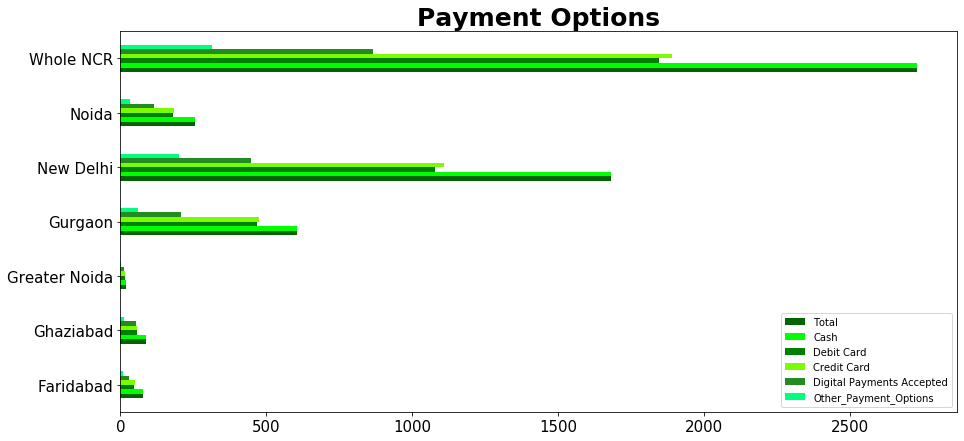

,Total,Cash,Debit Card,Credit Card,Digital Payments Accepted,Other_Payment_Options
0,78.0,78.0,48.0,49.0,31.0,8.0
1,89.0,89.0,56.0,56.0,53.0,11.0
2,21.0,21.0,16.0,16.0,13.0,1.0
3,606.0,605.0,470.0,477.0,207.0,61.0
4,1683.0,1682.0,1079.0,1109.0,448.0,201.0
5,256.0,256.0,179.0,184.0,115.0,32.0
Total,2733.0,2731.0,1848.0,1891.0,867.0,314.0


In [66]:
 y=['Total','Cash','Debit Card','Credit Card','Digital Payments Accepted','Other_Payment_Options']
pivot_city.plot.barh(x='City',y=y, figsize=(15,7),color=('darkgreen','lime','green','lawngreen','forestgreen','springgreen'))
# set the label
# display the plotted Horizontal Bar Chart
plt.ylabel(None)
plt.title('Payment Options',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
pivot_city[y]

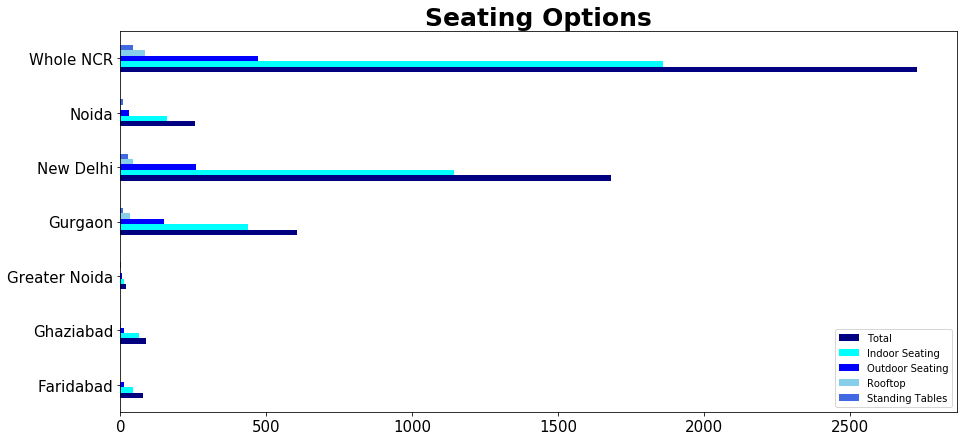

,Total,Indoor Seating,Outdoor Seating,Rooftop,Standing Tables
0,78.0,44.0,13.0,0.0,0.0
1,89.0,65.0,14.0,1.0,0.0
2,21.0,12.0,7.0,0.0,1.0
3,606.0,437.0,151.0,34.0,9.0
4,1683.0,1143.0,259.0,45.0,26.0
5,256.0,159.0,29.0,3.0,9.0
Total,2733.0,1860.0,473.0,83.0,45.0


In [67]:
y=['Total','Indoor Seating','Outdoor Seating','Rooftop','Standing Tables']
pivot_city.plot.barh(x='City', y=y,figsize=(15,7),color=('navy','cyan','blue','skyblue','royalblue'))
# set the label
# display the plotted Horizontal Bar Chart
plt.ylabel(None)
plt.title('Seating Options',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
pivot_city[y]

In [68]:
def hbarplot(x,y,a):
    """function to plot horizontal bar graph
        Args:
        x (str) : x column
        y (list): y columns
        a (str) : Title of plot
        
        
    """
    pivot_city.plot.barh(x=x,y=y, figsize=(15,7))
    plt.ylabel(None)
    plt.title(a,fontsize=25,fontweight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()
    y.insert(0, x)
    print(pivot_city[y].to_string(index=False))

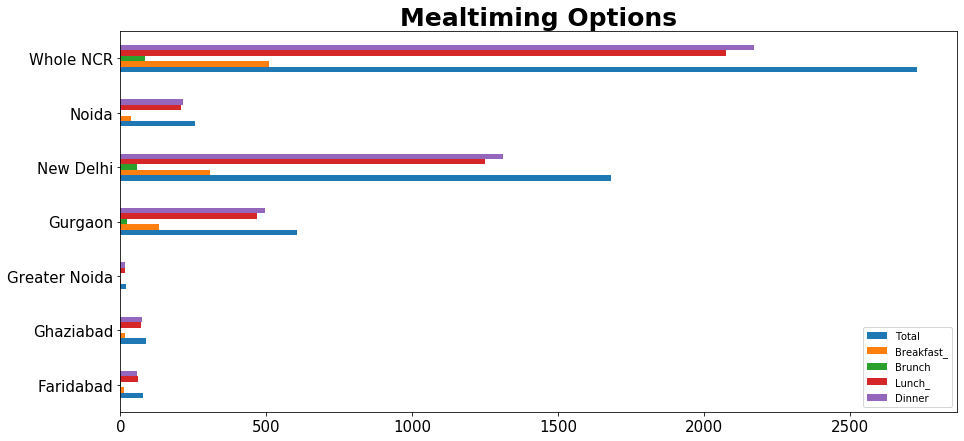

          City   Total  Breakfast_  Brunch  Lunch_  Dinner
     Faridabad    78.0        13.0     1.0    59.0    58.0
     Ghaziabad    89.0        17.0     0.0    71.0    74.0
 Greater Noida    21.0         3.0     0.0    16.0    17.0
       Gurgaon   606.0       133.0    22.0   470.0   496.0
     New Delhi  1683.0       306.0    57.0  1250.0  1312.0
         Noida   256.0        37.0     4.0   209.0   214.0
     Whole NCR  2733.0       509.0    84.0  2075.0  2171.0


In [69]:
hbarplot('City',['Total','Breakfast_','Brunch','Lunch_','Dinner'],'Mealtiming Options')

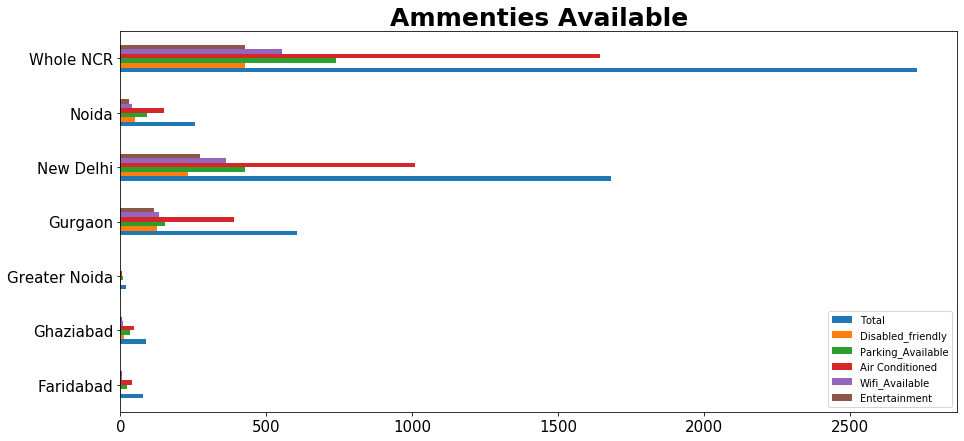

          City   Total  Disabled_friendly  Parking_Available  Air Conditioned  Wifi_Available  Entertainment
     Faridabad    78.0                3.0               24.0             40.0             6.0            6.0
     Ghaziabad    89.0               14.0               34.0             48.0            10.0            5.0
 Greater Noida    21.0                2.0                9.0              7.0             0.0            0.0
       Gurgaon   606.0              125.0              153.0            390.0           134.0          114.0
     New Delhi  1683.0              233.0              427.0           1009.0           363.0          272.0
         Noida   256.0               51.0               93.0            151.0            41.0           30.0
     Whole NCR  2733.0              428.0              740.0           1645.0           554.0          427.0


In [70]:
hbarplot('City',['Total','Disabled_friendly','Parking_Available','Air Conditioned','Wifi_Available','Entertainment'],'Ammenties Available')

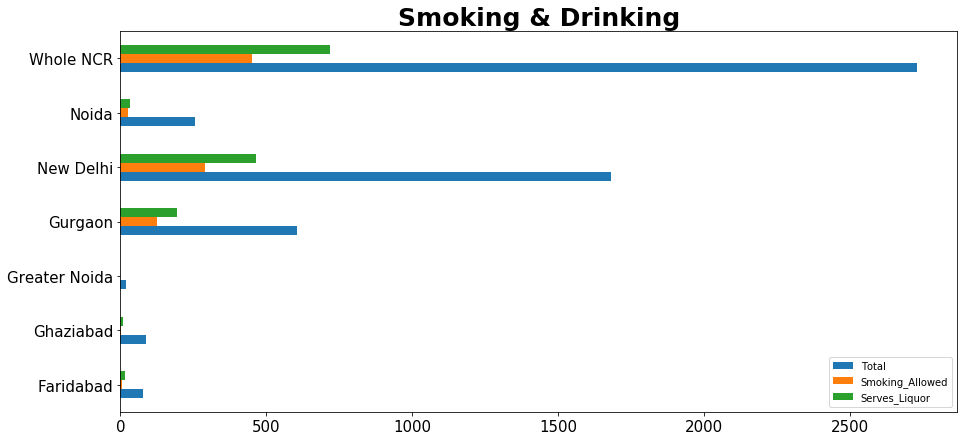

          City   Total  Smoking_Allowed  Serves_Liquor
     Faridabad    78.0              5.0           17.0
     Ghaziabad    89.0              3.0            9.0
 Greater Noida    21.0              0.0            0.0
       Gurgaon   606.0            127.0          194.0
     New Delhi  1683.0            290.0          466.0
         Noida   256.0             28.0           33.0
     Whole NCR  2733.0            453.0          719.0


In [71]:
hbarplot('City',['Total','Smoking_Allowed','Serves_Liquor'],'Smoking & Drinking')

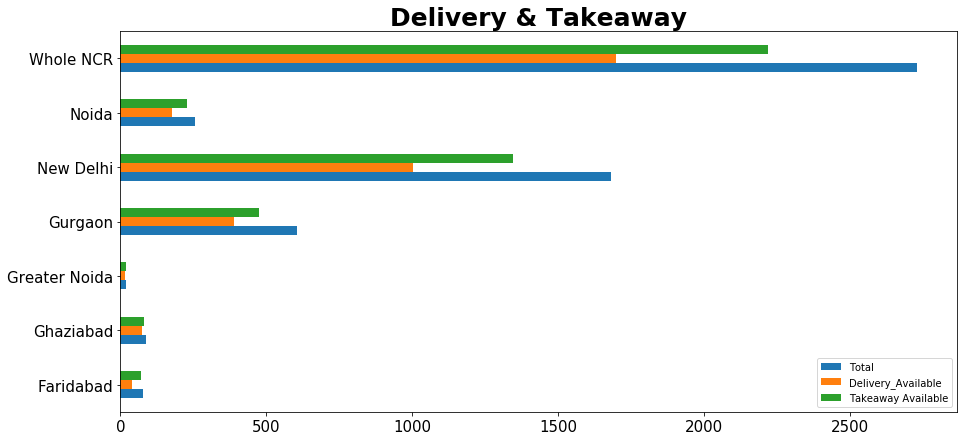

          City   Total  Delivery_Available  Takeaway Available
     Faridabad    78.0                41.0                70.0
     Ghaziabad    89.0                73.0                81.0
 Greater Noida    21.0                16.0                19.0
       Gurgaon   606.0               391.0               475.0
     New Delhi  1683.0              1004.0              1347.0
         Noida   256.0               176.0               227.0
     Whole NCR  2733.0              1701.0              2219.0


In [72]:
hbarplot('City',['Total','Delivery_Available','Takeaway Available'],'Delivery & Takeaway')

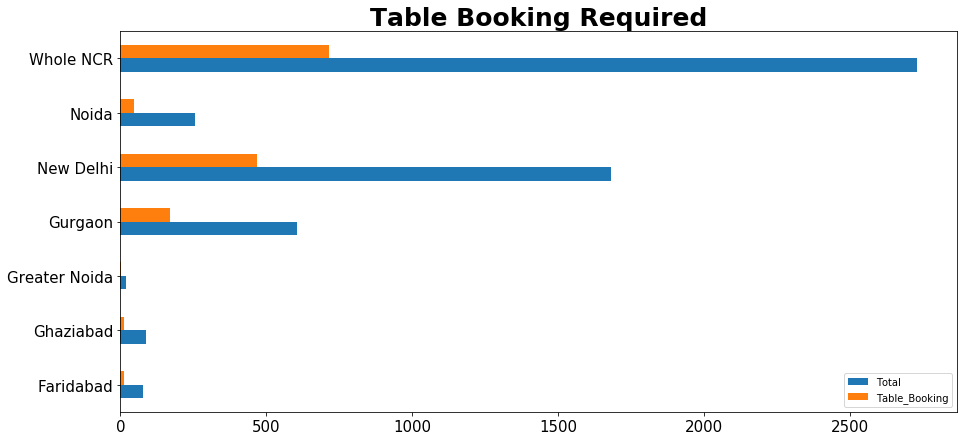

          City   Total  Table_Booking
     Faridabad    78.0           11.0
     Ghaziabad    89.0           14.0
 Greater Noida    21.0            4.0
       Gurgaon   606.0          169.0
     New Delhi  1683.0          470.0
         Noida   256.0           47.0
     Whole NCR  2733.0          715.0


In [73]:
hbarplot('City',['Total','Table_Booking'],'Table Booking Required')

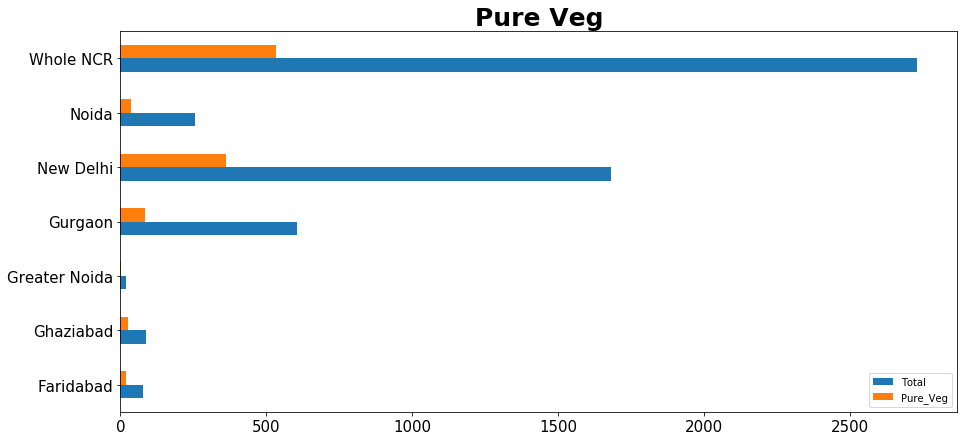

          City   Total  Pure_Veg
     Faridabad    78.0      19.0
     Ghaziabad    89.0      28.0
 Greater Noida    21.0       4.0
       Gurgaon   606.0      84.0
     New Delhi  1683.0     363.0
         Noida   256.0      35.0
     Whole NCR  2733.0     533.0


In [74]:
hbarplot('City',['Total','Pure_Veg'],'Pure Veg')

### 6 Saving Pivots in excel

In [75]:
with pd.ExcelWriter("zomato_features_pivot.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    pivot_type.to_excel(writer, sheet_name="Pivot_Type", index=False)
    pivot_city.to_excel(writer, sheet_name="Pivot_City", index=False)
    pivot_pr.to_excel(writer, sheet_name="Pivot_Price_Range", index=False)
    pivot_rr.to_excel(writer, sheet_name="Pivot_Rating_Range", index=False)
    pivot_rt.to_excel(writer, sheet_name="Pivot_Rating_Text", index=False)
    pivot_phr.to_excel(writer, sheet_name="Pivot_Photo_Range", index=False)
    pivot_vr.to_excel(writer, sheet_name="Pivot_Vote_Range", index=False)
    